In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
X_df = pd.read_csv("../data/transformed/std_norm_rfm_data.csv")

X_df.head()

Recency_of_Purchase  Frequency_of_Purchases  Amount_Spent
0             0.598733               -0.220071      0.770122
1            -0.360038                0.511108      0.780475
2            -0.267890               -0.950178      0.159362
3            -0.989339               -0.030237      0.142455
4             0.921777               -0.281927     -0.266167

In [3]:
X_df.shape

(4338, 3)

#### here we use k-nearest neighbours to find the optimal eps value

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

In [4]:
nn_model = NearestNeighbors()

nn_model.fit(X_df)

NearestNeighbors()

In [5]:
distances, _ = nn_model.kneighbors(X_df)
distances = np.sort(distances, axis=0)[:, 1]

distances

array([0.        , 0.        , 0.        , ..., 0.19646409, 0.20032078,
       0.27687413])

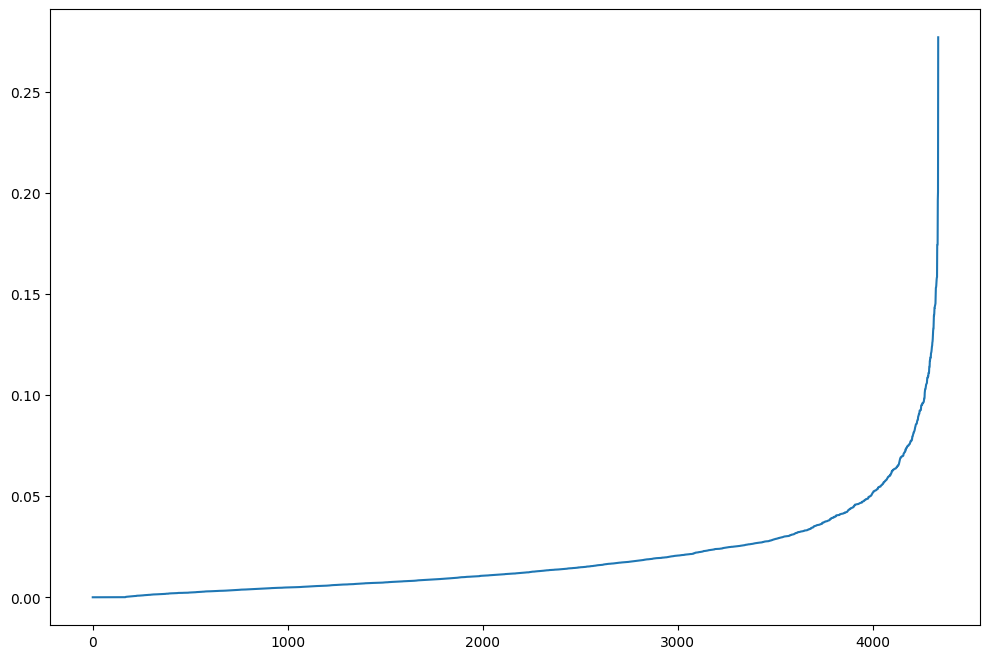

In [6]:
plt.figure(figsize=[12, 8])

plt.plot(distances)

plt.show()

In [7]:
model = DBSCAN(eps=0.07, min_samples=20)

model.fit(X_df)

DBSCAN(eps=0.07, min_samples=20)

Labels are obtained and dataframe with labels is formed

In [8]:
X_df["Clusters"] = model.labels_

X_df.head()

Recency_of_Purchase  Frequency_of_Purchases  Amount_Spent  Clusters
0             0.598733               -0.220071      0.770122        -1
1            -0.360038                0.511108      0.780475         1
2            -0.267890               -0.950178      0.159362        -1
3            -0.989339               -0.030237      0.142455        -1
4             0.921777               -0.281927     -0.266167         0

Checking distribution of data points in clusters. There are 4 cluesters and -1 cluester assignments (1591 nos.) are noise which will be filtered

In [9]:
X_df["Clusters"].value_counts()

 0    2137
-1    1591
 1     514
 3      65
 2      31
Name: Clusters, dtype: int64

Checking the silhoutte score

In [10]:
silhouette_score(X_df, model.labels_) 

0.4636909343585801

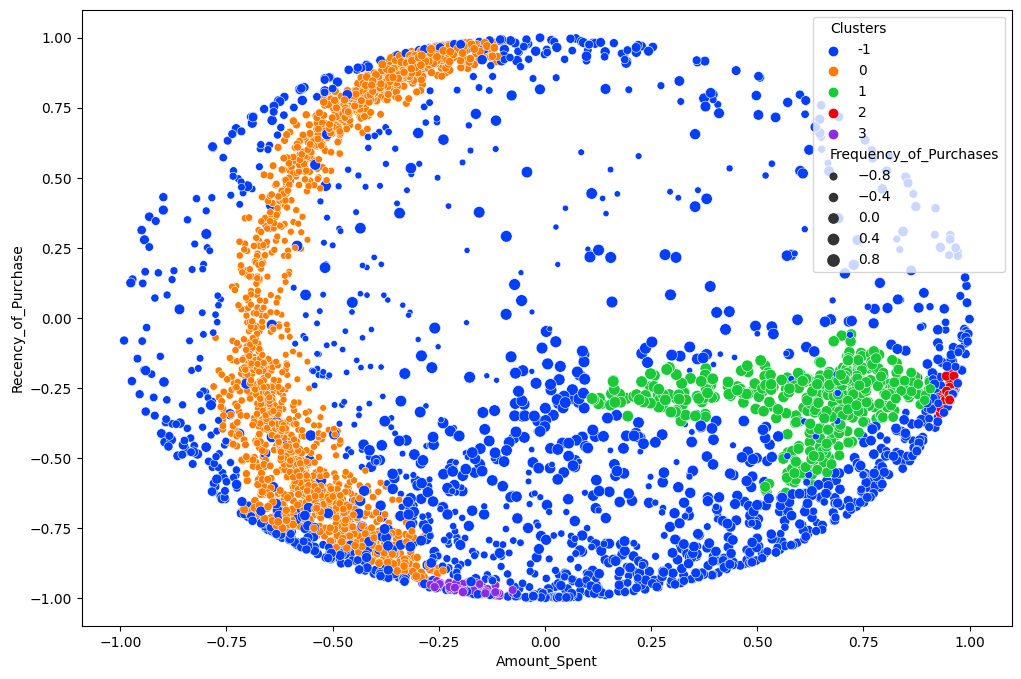

In [11]:
plt.figure(figsize=[12, 8])

sns.scatterplot(x="Amount_Spent", y="Recency_of_Purchase", data=X_df , 
                size="Frequency_of_Purchases", hue="Clusters", 
                palette="bright")

plt.show()

3D Representation

In [12]:
plt.figure(figsize=[12, 8])

fig = px.scatter_3d(X_df , x="Recency_of_Purchase", y="Frequency_of_Purchases", 
                    z="Amount_Spent", color="Clusters")

fig.show()

<Figure size 1200x800 with 0 Axes>

Denoising the Dataframe with cluster labels

In [13]:
X_filtered_df = X_df.copy()

X_filtered_df.drop(X_filtered_df[X_filtered_df["Clusters"] == -1 ].index , inplace=True)

X_filtered_df.head()

Recency_of_Purchase  Frequency_of_Purchases  Amount_Spent  Clusters
1             -0.360038                0.511108      0.780475         1
4              0.921777               -0.281927     -0.266167         0
6              0.716965               -0.511621     -0.473503         0
8              0.813811               -0.465048     -0.348485         0
10            -0.193051                0.223007      0.955510         2

PLotting the clusters with denoised data

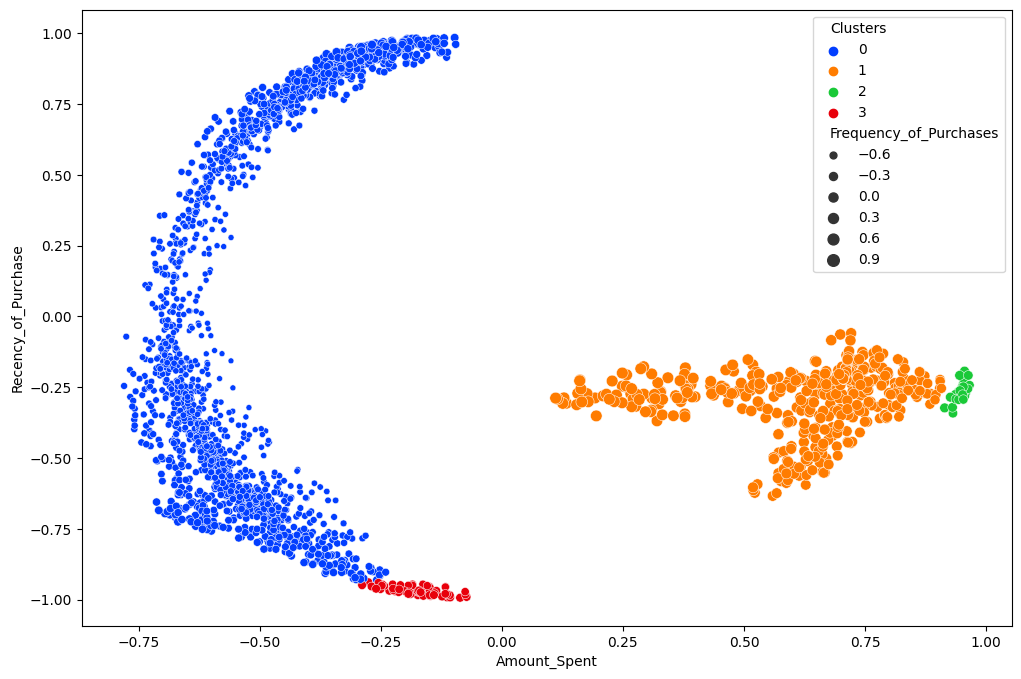

In [14]:
plt.figure(figsize=[12, 8])

sns.scatterplot(x="Amount_Spent", y="Recency_of_Purchase", data=X_filtered_df , 
                size="Frequency_of_Purchases", hue="Clusters", 
                palette="bright")

plt.show()

In [15]:
plt.figure(figsize=[12, 8])

fig = px.scatter_3d(X_filtered_df, x="Recency_of_Purchase", y="Frequency_of_Purchases", 
                    z="Amount_Spent", color="Clusters")

fig.show()

<Figure size 1200x800 with 0 Axes>

#### Cluster profiling-
* cluster 0 customers are a large group which have highest avg recency but Frequency and Amount spend are lowest
* cluster 1 customers have high avg Spending and highest avg Frequency of purchases.
* cluster 2 are the small group of people that have moderate avg values of Frequency but have highest spending
* cluster 3 are the group of people that have low avg values of every variables(RFM)(Recency being lowest)

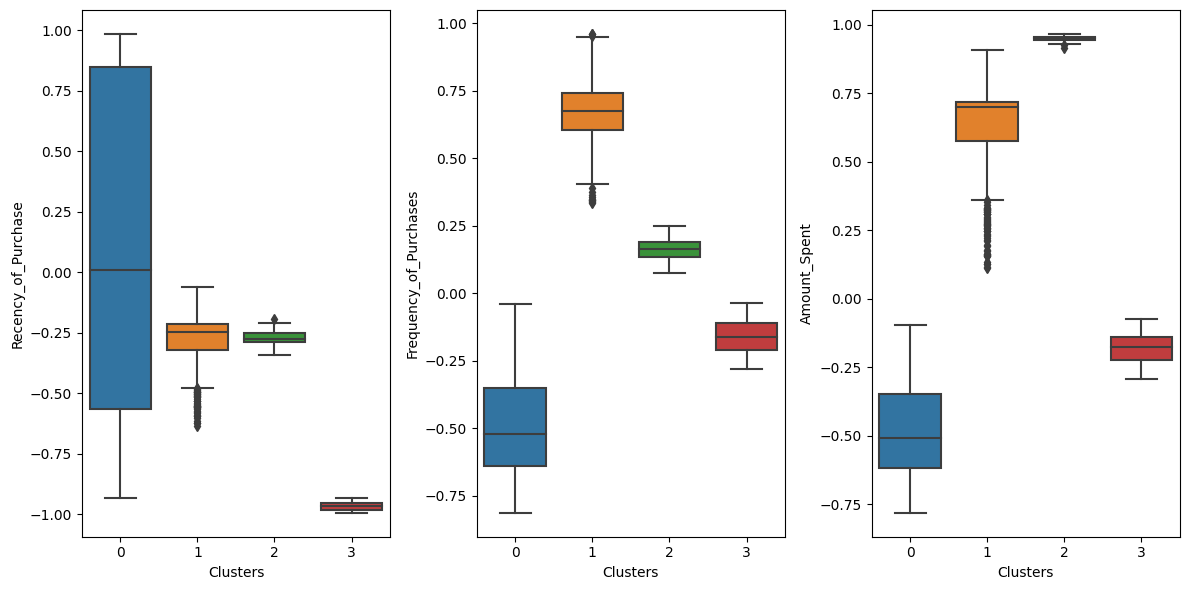

In [16]:
fig, axes = plt.subplots(1, 3, figsize=[12, 6])

sns.boxplot(x="Clusters", y="Recency_of_Purchase", data=X_filtered_df, ax=axes[0])
sns.boxplot(x="Clusters", y="Frequency_of_Purchases", data=X_filtered_df, ax=axes[1])
sns.boxplot(x="Clusters", y="Amount_Spent", data=X_filtered_df, ax=axes[2])


plt.tight_layout()
plt.show()

In [17]:
X_filtered_df.to_csv("../data/transformed/dbscan_data.csv", index=False)